In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Image

# Постановка задачи
Пусть у нас есть материальная точка массой $m$, движующаяся под
действием центральной силы $F$ с центром точке $O$, тогда, если взять начало координат в точке $O$, 2-ой закон Ньютона для этой точки выглядит следующим образом: $$m\ddot{\vec{r}} = \frac{F(r)\vec{r}}{r}$$

Момент сил $M_{O}$ относительно точки $O$ равен нулю, тогда $\vec{K_{O}} = \vec{r} \times \vec{v} = const$, отсюда можно сделать вывод, что движение плоское. Из геометрического смысла векторного произведения поймем, что $K_{O} = 2\dot{S} = const$, где $S$ - площадь, заметаемая радиус-вектором $\vec{r}$. Это выражение называется интегралом площадей.


Тогда запишем уравнение движения в полярных координатах:
$$mw_{\phi} = 0$$
$$mw_{r} = F(r)$$

Далее, подставив выражения для ускорений в полярных координатах, получим:
$$w_{\phi} = \ddot{\phi}r^{2} + 2r\dot{r}\dot{\phi} = \frac{d (r^2\dot{{\phi}})}{d t} = 0 \rightarrow \frac{K_{O}}{m} = {r^2\dot{\phi}} = const = c $$
$$mw_{r} = m(\ddot{r} - r\dot{\phi}^2) = F(r)$$

Используем подстановку Бине $r = 1/u$, получим:
$$\dot{\phi} = cu^{2}\quad
  u^{'} = \frac{d u}{d {\phi}}\quad\dot{r} = -c u'\quad\ddot{r} = -c^2u^2u^{''}$$

Подставим эти выражения в уравнение движения:
$$\frac{d^2 u}{d \phi^2} + u = - \frac{F(\frac{1}{u})}{mc^2u^2}$$

Решив это уравнение, можем получить траекторию движения материальной точки в центральном поле.

# Ньютоновское поле


Рассмотрим взаимодействие двух материальных точек, массами $M$ и $m$, сила взаимодействия между ними описывается выражением:
$$\vec{F} = -\frac{km\vec{r}}{r^3}, \quad k = {\gamma}M$$

Из теоремы Гаусса для гравитационного поля следует, что сила взаимодействия между однородным шаром и материальной точкой
описывается этой же формулой. Если шар достаточно массивный, то есть $M \gg m$, можно считать, что он неподвижен. Тогда движение точки 2 - движение в поле центральных сил, причем полюс силы в точке симметрии шара.

Подставим значение силы в уравнение Бине:
$$u^{''} + u = \frac{1}{p}, \quad p = \frac{c^2}{k
}$$

Решив уравнение колебаний, получим:
$$u = \frac{1}{p} + A \cos(\phi - \phi_{0}) \rightarrow r = \frac{p}{1 + e\cos(\phi-\phi_{0})}, \quad e = Ap, \quad e > 0  $$

Отсюда можно сделать, что траектория движения точки 2 - кривая вторая порядка, причем тип зависит от начальных условий.


## Интеграл энергии
Из того, что Ньютоновское поле центрально-симметрично следует, что сила консервативна. Тогда интеграл полной механической энергии материальной точки, движующейся в этом поле, записывается в виде: $$ E = T + \Pi = \frac{m(\dot{r}^2 + r^2\dot{\phi}^2)}{2} - \frac{km}{r} = const $$
Введем $h = \frac{2E}{m}$, это удвоенная полная энергия единичной массы.

Выразим $e$ через интеграл энергии и интеграл площадей: $$e\cos(\phi-\phi_{0}) = \frac{p}{r} - 1 \quad e\sin(\phi-\phi_{0}) = \frac{c\dot{r}}{k}$$
Подставим в интеграл энергии и получим, что $e = \sqrt{1+h\frac{c^2}{k^2}}$.

## Примеры
Из уравнения траектории понятно, что $p, e, \phi_{0}$ однозначно определяют траекторию. Напишем код, который строит нам траекторию по этим параметрам(договоримся, что все величины в СИ):

In [ ]:
## Функция, строящая траекторию движения по эксцентриситету и фокальному параметру
def CreateTrajectory(p, e, phi, name):

    theta = np.linspace(0, 6 * np.pi, 400)
    r = p / (1 + e * np.cos(theta - phi))

    plt.ioff()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111, polar=True)
    line, = ax.plot(theta, r)
    point, = ax.plot([], [], 'ro')

    if (e >= 1) :
        ax.set_ylim(0, 10 * p)

    ax.set_title(f'Траектория при p = {p}, e = {e}, $\phi_{0}$ = {phi}')

    ax.plot([0], [0], 'ro', markersize=(p / (1 + e)))

    def init():
        point.set_data([], [])
        return point,

    def update(frame):
        point.set_data([theta[frame]], [r[frame]])
        return point,

    ani = FuncAnimation(fig, update, frames=len(theta), init_func=init, blit=True)

    ani.save(f'{name}.gif', writer='pillow')

    return Image(filename=f'{name}.gif')

### Пример 1
Положим $e = 1$, тогда $h = 0$, в этом случае траектория - парабола. Убедимся в этом, построив график с этими параметрами:

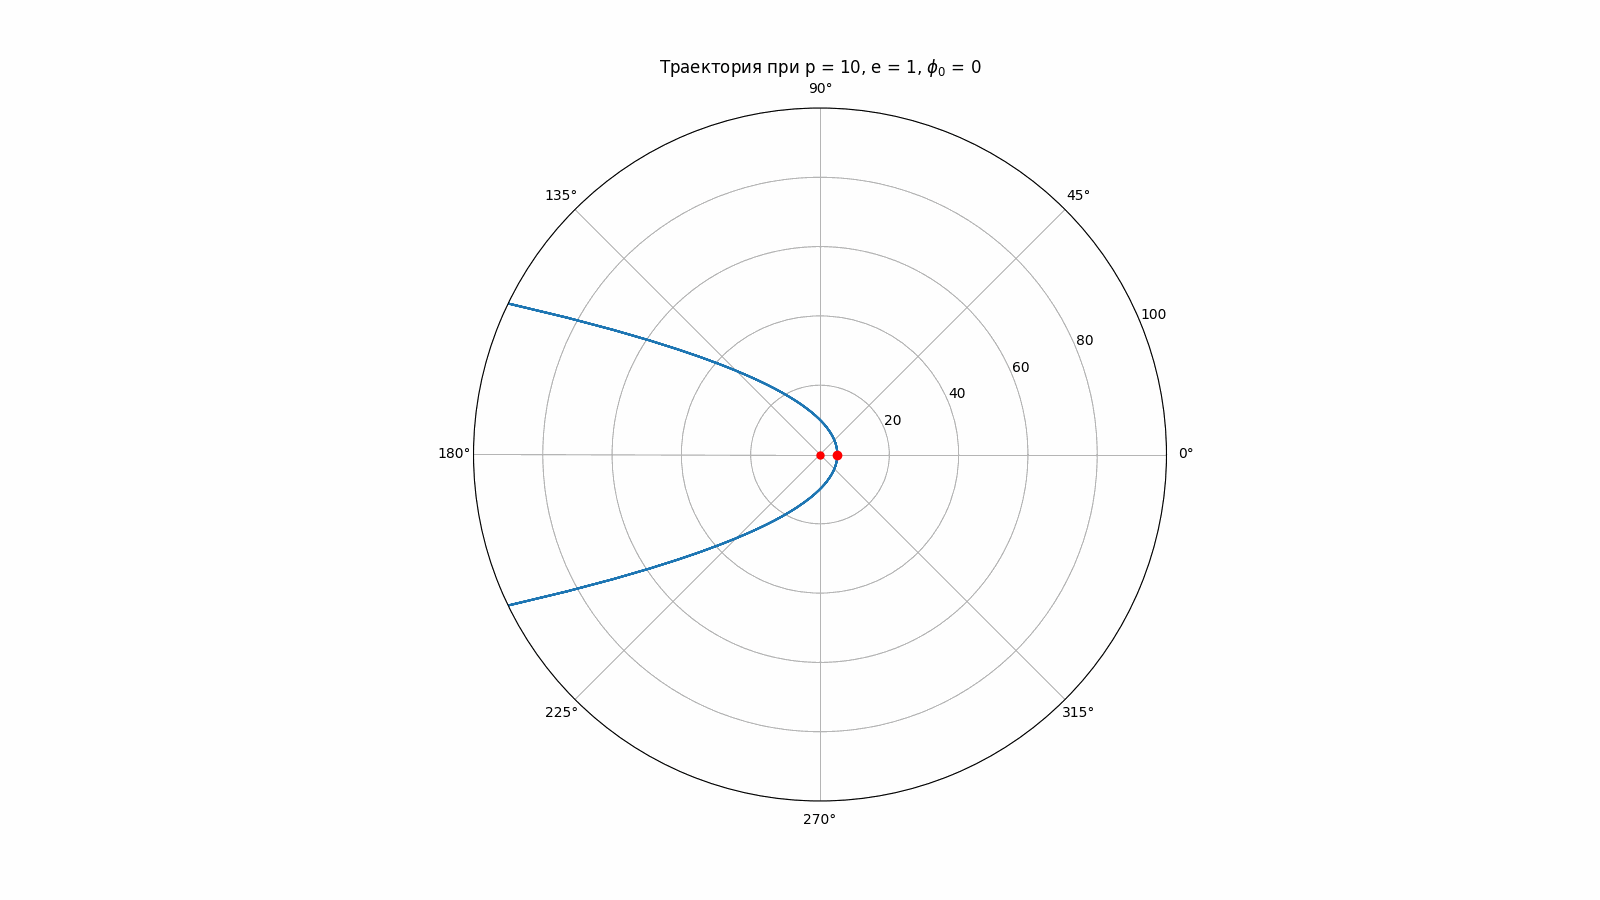

In [ ]:
CreateTrajectory(10, 1, 0, 'parabola')

## Пример 2
Если $e < 1$, тогда $h < 0$. Убедимся в том, что траектория - эллипс:


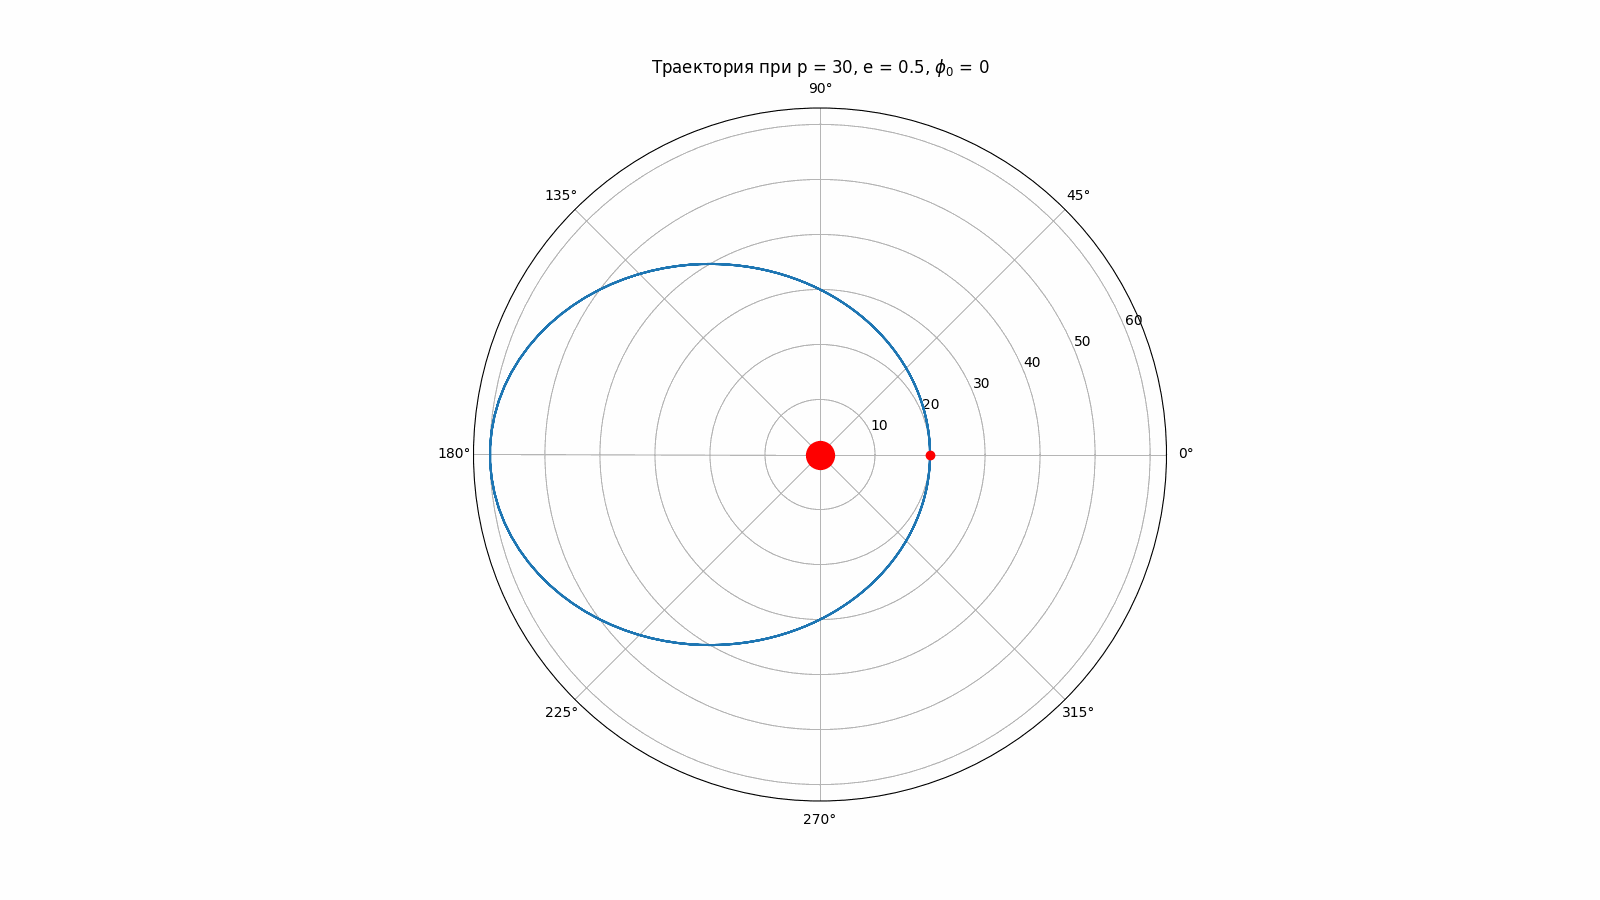

In [ ]:
CreateTrajectory(30, 0.5, 0, 'ellips')

## Пример 3
Если $e > 1$, тогда $h > 0$. В этом случае траектория - гипербола.

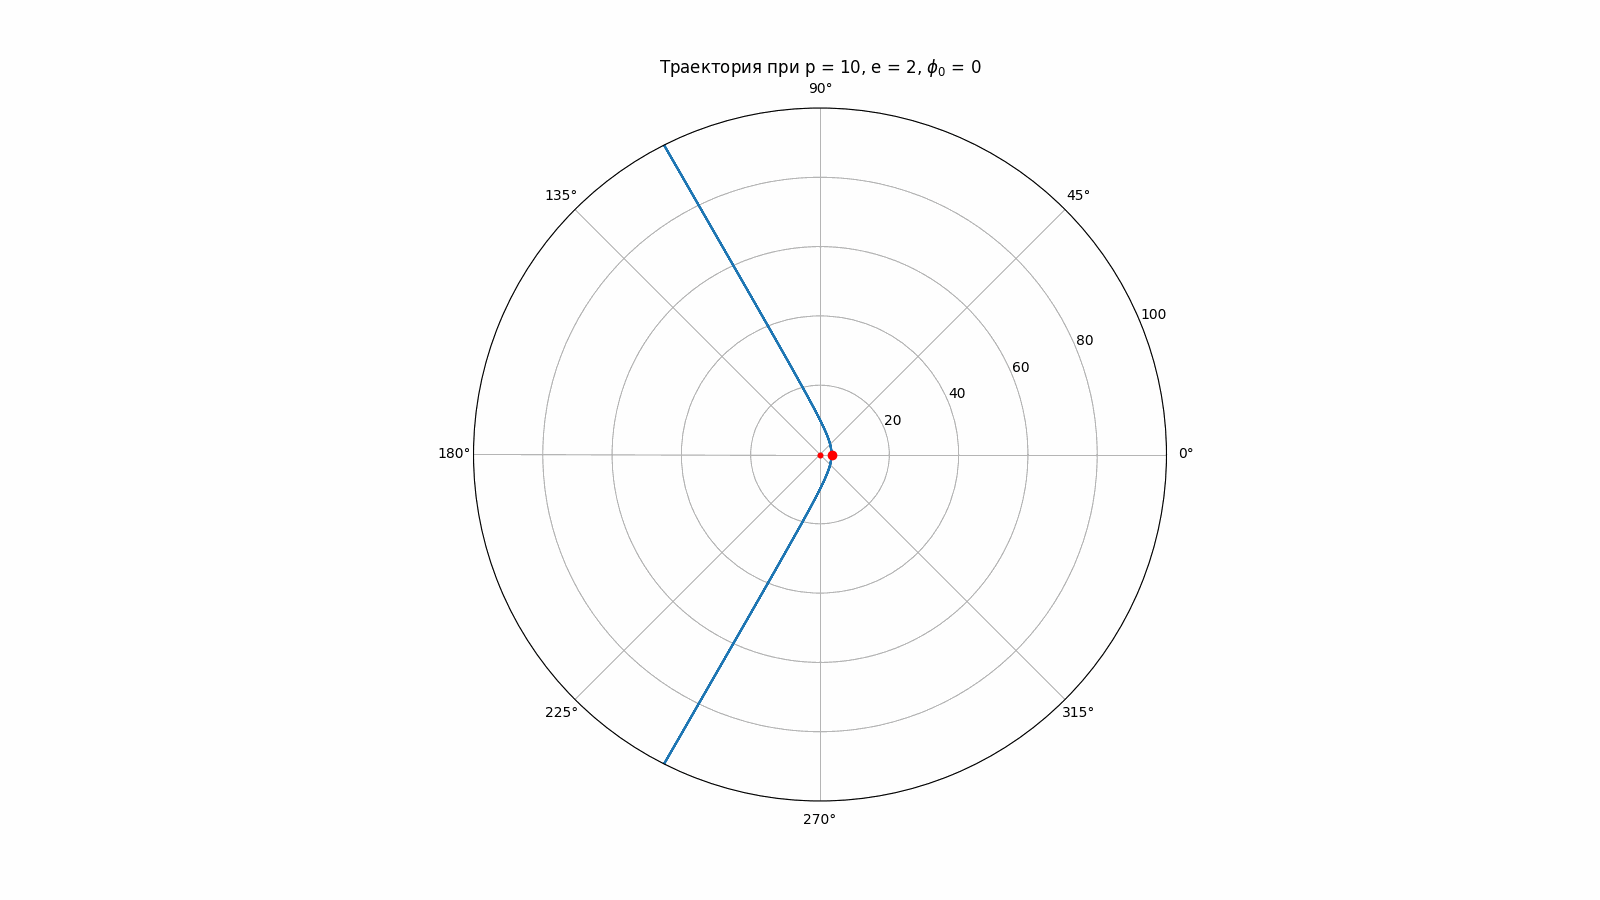

In [ ]:
CreateTrajectory(10, 2, 0, 'hyperbola')

## Здесь вы можете поэкспериментировать, меняя параметры траектории:


In [ ]:
#Настоятельно рекомендую для корректного и красивого построения графика брать значения p < 1.
angle = float(input('Введите значениe угла в радианах'))
e = float(input('Введите значение эксцентриситета (e > 0)'))
p = float(input('Введите значение фокального параметра'))

CreateTrajectory(p, e, angle, 'your')

# Прецессия перицентра


В прикладных задачах траектории движения спутников отличаются от Кеплеровских орбит в силу различных явлений, например, за счет гравитационного возмущения от других планет.

Тогда суммарная сила $F_{tot}$, действующая на спутник, выглядит следующим образом: $$\vec{F_{tot}} = -\frac{km\vec{r}}{r^3} + \vec{F}$$

Где $F$ - сила возвущения.

Рассмотрим случай, когда сила возмущения $F = \frac{mH}{r^3}$, где $H$ - постоянный отрицательный коэффициент. Причем такой, что 1 $ \gg \left|\frac{H}{c^2}\right|$. Тогда, используя уравнение Бине, получим уравнение колебаний, дающее нам траекторию: $$r = \frac{p\omega^2}{(1+e\cos(\omega(\phi - \phi_0))}, \quad p = \frac{c^2}{k}$$
## Оценка параметров траектории Меркурия

Положим $\phi_{0} = 0$ (нам не особо важно, как повернута орбита). Для того, чтобы найти угловое смещение орбиты Меркурия за период найдем, на сколько сместится точка экстремума. Для этого необходимо продифференцировать уравнение движения, тогда получим, что:
$$\Delta\theta = 2\pi(\frac{1}{\omega} - 1)$$
Возьмем данные из Википедии. Угловое смещение перигелия Меркурия $\Delta\theta \approx 43.1$ угловых секунд за столетие. Эксцентриситет орбиты $e \approx 0.206$, большая полуось $a = 57 909 227 км$. Тогда:
$$\omega \approx 1 - 1.065 \cdot 10^{-14},\quad p = a(1-e^{2}) \approx 55 451 791 км $$
Подробнее и строже об этом можно прочесть по ссылке http://isaac-scientific.com/4/1880/4/3/08/2019/AdAp.html.

Давайте для некоторых параметров построим траекторию, и посмотрим, как движется спутник:


In [ ]:
omega = 1 - 1.065 * 10 ** (-2)
p = 1
e = 0.206

def CreateTrajectoryWithPrecession(p, e, omega) :
    theta = np.linspace(0, 10 * np.pi, 500)
    r = p * omega ** 2 / (1 + e * np.cos(omega * theta))

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111, polar=True)
    line, = ax.plot(theta, r)
    point, = ax.plot([], [], 'ro')

    def init():
        point.set_data([], [])
        return point,

    def update(frame):
        point.set_data([theta[frame]], [r[frame]])
        return point,

    ani = FuncAnimation(fig, update, frames=len(theta), init_func=init, blit=True)

    ani.save('precession.gif')

    return HTML('<img src="precession.gif">')

CreateTrajectoryWithPrecession(p, e, omega)